# Libraries used

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Hardware Accelerator

In [3]:
# Instantiates the device to be used as GPU/CPU based on availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Loading Dataset

In [8]:
trainPath = r"data\Synthetic Train Set - Detection & Recognition"
testPath = r"data\real_Image_dataset_Detection"

In [9]:
# To converts PIL images to Pytorch Tensors
transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                transforms.ToTensor()])

In [10]:
trainset = torchvision.datasets.ImageFolder(root = trainPath, transform = transform)
testset = torchvision.datasets.ImageFolder(root = testPath, transform = transform)

In [11]:
print(f"""Total number of images used for training the model = {len(trainset.samples)}.
Total number of images used for testing the model = {len(testset.samples)}.""")

Total number of images used for training the model = 116132.
Total number of images used for testing the model = 428.


In [12]:
batch_size = 4

In [13]:
trainloader = DataLoader(trainset, batch_size = batch_size, shuffle = True)
testloader = DataLoader(testset, batch_size = batch_size, shuffle = False)

# Visualizing Data

In [14]:
# Function to plot a single image
def imshow(img, title):
    npimg = img.numpy()
    plt.figure(figsize = (batch_size, 1))
    plt.axis("off")
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [15]:
# Function to plot a batch 
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title = [str(x.item()) for x in labels])

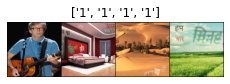

In [18]:
for i in range(1):
    show_batch_images(trainloader)